# Numerical project (Problem set 10) - BIO-389
# Inference on biological sequence data
## Prof. Anne-Florence Bitbol

In [1]:
# Dependencies : to install, run the following command:
# conda env create -f BIO-369.yml

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from Bio import SeqIO

from scipy.stats import entropy

from IPython.display import HTML

# 1. Statistical dependence in protein sequence data – 8 points

In this problem, we will consider the data in the ﬁle MALGMALK1.fasta (and then also the similar ﬁle MALGMALK2.fasta). This ﬁle contains an alignment of amino acid sequences of homologs of the Escherichia coli proteins MALG and MALK, concatenated together. In each sequence, the ﬁrst 177 amino acids correspond to a MALG homolog and the next ones correspond to a MALK homolog. Here, alignment gaps will be considered just as an extra character (i.e. exactly like the letters representing amino acids).

## 1.a) Loading and mapping - data preprocessing

In [2]:
def read_fasta_file(filename, debug=False):
    # Open the file
    data = list(SeqIO.parse(filename, "fasta"))

    # Discard headers
    data = np.array([str(i.seq) for i in data])

    if debug:
        print(f"Number of sequences: {len(data)}")
        print(f"Length of sequences: {len(data[0])}")
        print(f"Original data : \n{data}")
    
    return data

def create_aa_mapping(data, debug=False):
    # Create a mapping from amino acids to integers
    amino_acids = ['A', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'M', 'N', 'P', 'Q', 'R', 'S', 'T', 'V', 'W', 'Y', '-']
    mapping = {amino_acid: i for i, amino_acid in enumerate(amino_acids)}

    # Transform the sequences
    mapdata = np.array([[mapping[amino_acid] for amino_acid in sequence] for sequence in data])

    if debug:
        print(f"Encoded numpy matrix : \n{mapdata}")
    
    return mapdata, mapping

In [3]:
data = read_fasta_file("MALGMALK1.fasta", debug=True)
mapdata, ___ = create_aa_mapping(data, debug=True)

data2 = read_fasta_file("MALGMALK2.fasta")
mapdata2, ___ = create_aa_mapping(data2)

Number of sequences: 5004
Length of sequences: 319
Original data : 
['-MWRFRGSQLFFGLLLFGCFLPFQVILLPASFT-----LGQLGLANTTEGLVLVHVVYGLAFTTLFFRNFYVSIPEALVRAARLDGAGFFTIFARILLPMSVPTIMVCLIWQFTQIWNDFLFGVVFA--SDTQPITVALNNLVNTSTGAYNVDMAAAMIAGLPTLLVYILAGKYFLRKNIELAIDSGEFLILVGPSGCGKSTLMNCIAGLENISGGAILVDGADISGMSPKDRDIAMVFQSYALYPTMTVKDNIAFGKLPPAEIEAEVARVAKLLQIEHLLSRKP----GQLSGGQQQRVAMGRALARRPKIYLFDEPL'
 'ARDEMPFRRFITALLLSPMIVPLIITAAGMFFFY----SNL-GLAGGYLGVILAHAALGTPFVIITVTATLTGFDYSLARAALNLGATPIRVFFDVIMPLIRPGVISGALFAFITSFDEVVVILFMAGP--QQRTIPRQMFSGLREQI--NPSILAIATLLILV-------------TDINIEIGQGQFITLLGPSGCGKSTLLRCIAGLTEVDGGQILLDGEDLVPVAPQKRGIGMVFQSYALFPNMTVQQNVAFGKVPAVEASKRVAEVLELVELNDYANRYP----QQLSGGQCQRVALARSLVTRPRLLLLDEPL'
 'TKFEFRGKSILITLIDMPFSVSPVVAGLIYVLLFGSLDSQNLQIVYAVPGIVLATIFVTFPFVARELIPLMEEQGTTEEEAARLLGANGWQMFWHVTLPNVKWALIYGVVLCTARAMGEFGAVSVVSGHITNTLPLHIEILYNEYNI----VAAFSVAILLLVMALVVLLLRQWSEANEINLSIQSGELVALLGPSGCGKTTLLRIIAGLETPDSGSIGFHGEDVSEHDVRDRNVGFVFQHYALFRHMTVFDNVAFGRPSEEVIKQKVHELLNLVQLDWLGDRY

## 1.b) Mean entropy computation

In [4]:
def compute_mean_entropies(data):
    # Calculate the entropy of each column
    column_entropies = []
    for column in data.T:
        ___, counts = np.unique(column, return_counts=True)
        frequencies = counts / len(column)
        entropy = -sum(p * np.log2(p) for p in frequencies)
        column_entropies.append(entropy)

    # Calculate the mean of the entropies over the MALG sites
    malg_entropies = column_entropies[:177]
    mean_malg_entropy = np.mean(malg_entropies)

    # Calculate the mean of the entropies over the MALK sites
    malk_entropies = column_entropies[177:]
    mean_malk_entropy = np.mean(malk_entropies)
    
    return column_entropies, mean_malg_entropy, mean_malk_entropy

In [5]:
entropy1, mean_MALG1, mean_MALK1 = compute_mean_entropies(mapdata)
entropy2, mean_MALG2, mean_MALK2 = compute_mean_entropies(mapdata2)

means = pd.DataFrame(
    {
        "File": ["File 1", "File 2"],
        "Mean entropy of MALG sites": [mean_MALG1.round(5), mean_MALG2.round(5)],
        "Mean entropy of MALK sites": [mean_MALK1.round(5), mean_MALK2.round(5)]
    }
)

HTML(means.to_html(index=False))

File,Mean entropy of MALG sites,Mean entropy of MALK sites
File 1,2.94939,1.69727
File 2,2.94939,1.69727


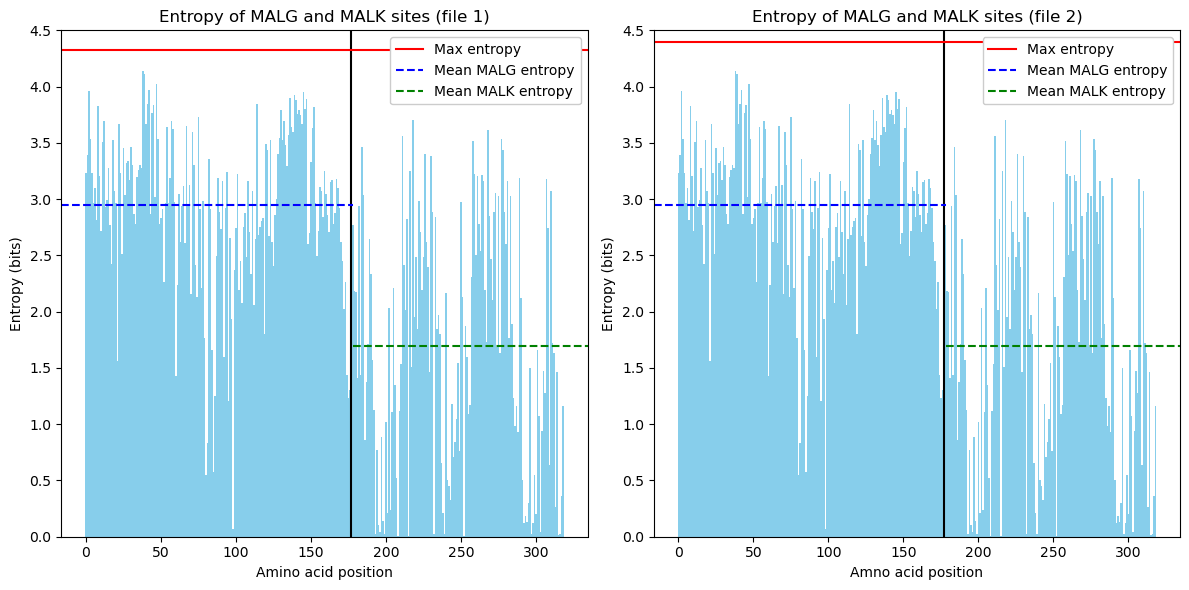

In [6]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Plot for entropy1
axs[0].bar(range(len(entropy1)), entropy1, color='skyblue')
axs[0].axvline(x=177, color='k', linestyle='-')
axs[0].axhline(y=np.log2(20), color='r', linestyle='-', label="Max entropy")
axs[0].axhline(y=mean_MALG1, color='b', linestyle='--', xmin=0, xmax=177/len(entropy1), label="Mean MALG entropy")
axs[0].axhline(y=mean_MALK1, color='g', linestyle='--', xmin=177/len(entropy1), xmax=1, label="Mean MALK entropy")
axs[0].set_xlabel("Amino acid position")
axs[0].set_ylim(0, 4.5)
axs[0].set_ylabel("Entropy (bits)")
axs[0].set_title("Entropy of MALG and MALK sites (file 1)")
axs[0].legend(framealpha=1)

# Plot for entropy2
axs[1].bar(range(len(entropy2)), entropy2, color='skyblue')
axs[1].axvline(x=177, color='k', linestyle='-')
axs[1].axhline(y=np.log2(21), color='r', linestyle='-', label="Max entropy")
axs[1].axhline(y=mean_MALG2, color='b', linestyle='--', xmin=0, xmax=177/len(entropy2), label="Mean MALG entropy")
axs[1].axhline(y=mean_MALK2, color='g', linestyle='--', xmin=177/len(entropy2), xmax=1, label="Mean MALK entropy")
axs[1].set_xlabel("Amno acid position")
axs[1].set_ylim(0, 4.5)
axs[1].set_ylabel("Entropy (bits)")
axs[1].set_title("Entropy of MALG and MALK sites (file 2)")
axs[1].legend(framealpha=1)

plt.tight_layout()
plt.show()

The entropy quantifies the uncertainty in a sequence, but can also be interpreted as an indicator of **lack of conservation**. For a highly conserved column, the entropy is low, wheras for one where nucleotides are uniformly distributed the entropy is high. 

Entropy is positive and its maximum value, obtained for the uniform case, is $\log_2(21) \cong 4.39$ in this case (21 possibilities for amino acids). By observing the plot of entropy over the different sites above, we observe some highly conserved sites in this dataset.

By comparing the two different mean entropies, we assess that the MALG protein sequence shows **higher variability** than the MALK sequence. This could indicate potential structural flexibility and fewer functional restraints in MALG, possibly due to a broader range of functional roles or interactions with diverse molecules.

The means are **similar** for both files 1 & 2, confirming the pattern of flexibility in MALG and conservation in MALK.

## 1.c) Mutual information matrix computation

In [7]:
def compute_mutual_info(data):
    # Define the number of amino acids for MALG and MALK & total number
    num_malg = 177
    num_malk = data.shape[1] - num_malg
    N = data.shape[1]

    # Create vectors to store entropy values
    entropyMALG = np.zeros(num_malg)
    entropyMALK = np.zeros(num_malk)
    jointEntropy = np.zeros((num_malg, num_malk))
    
    # Create an empty matrix to store the mutual information values
    mutual_info_matrix = np.zeros((num_malg, num_malk))
    
    # Calculate the mutual information between each pair of columns
    for i in range(num_malg):
        hist= np.histogram(data[:,i], bins=range(21))[0]
        entropyMALG[i]=entropy(hist/N, base=2)
        for j in range(num_malg, N):
            hist= np.histogram(data[:,j], bins=range(21))[0]
            entropyMALK[j-num_malg]=entropy(hist/N, base=2)
            
            # Calculate the joint entropy
            hist = np.histogram2d(data[:,i], data[:,j], bins=[range(21),range(21)])[0]
            aux = hist/N
            jointEntropy[i,j-num_malg] = entropy(aux.flatten(), base=2)
            
            # Calculate the mutual information        
            mutual_info_matrix[i, j-num_malg] = entropyMALG[i] + entropyMALK[j-num_malg] - jointEntropy[i,j-num_malg]
    
    return mutual_info_matrix

In [8]:
mutual_info_matrix = compute_mutual_info(mapdata)
mean_mutual_info = np.mean(mutual_info_matrix)

mutual_info_matrix2 = compute_mutual_info(mapdata2)
mean_mutual_info2 = np.mean(mutual_info_matrix2)

### Visualization (color map & histogram)

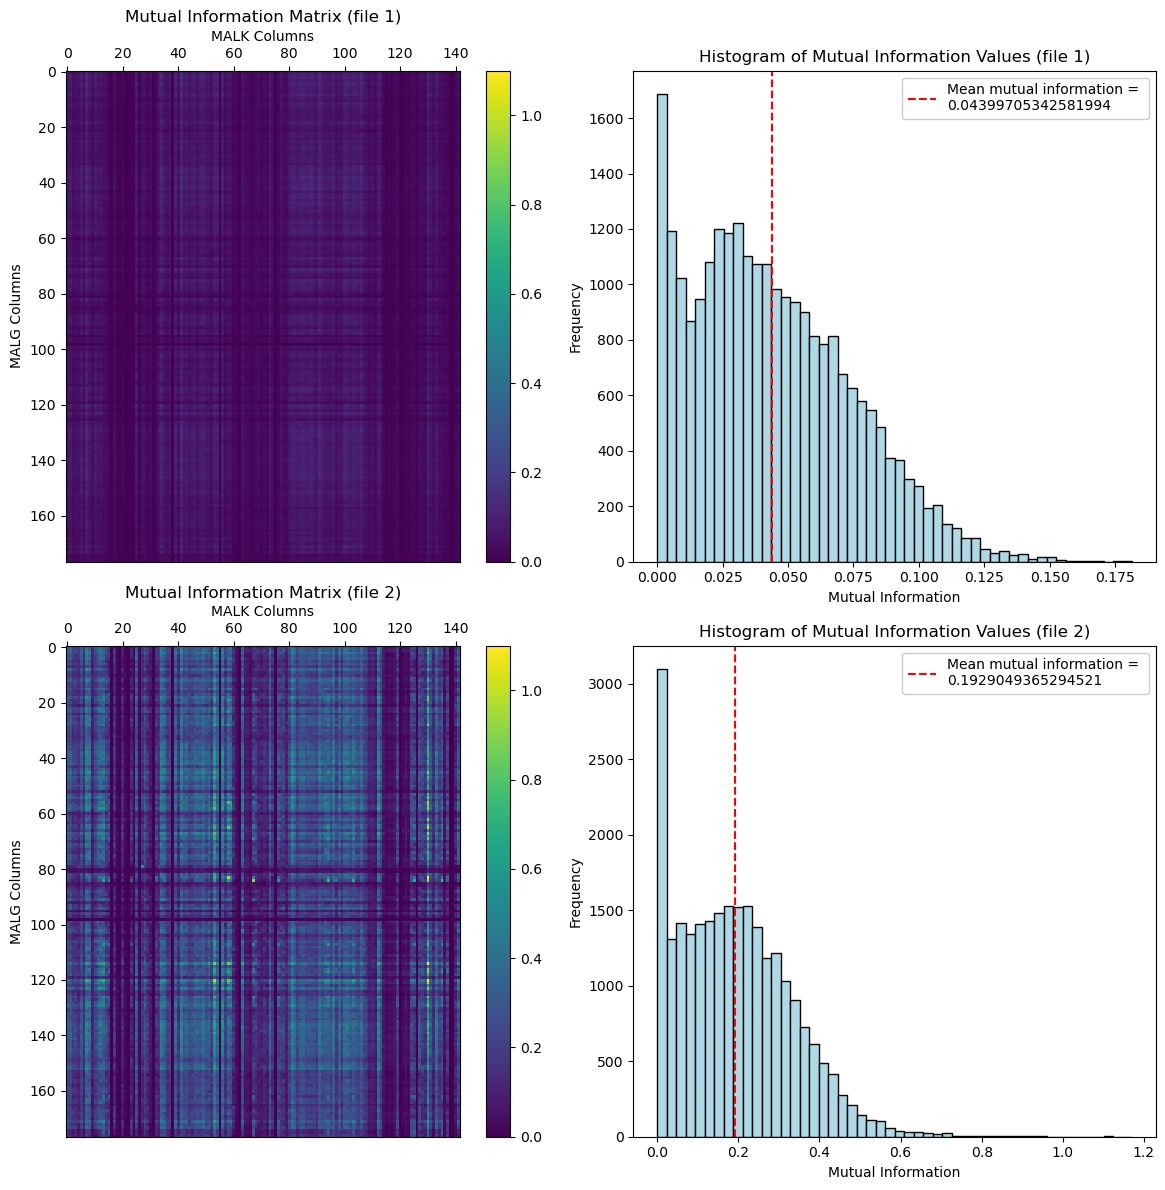

In [9]:
fig, axs = plt.subplots(2, 2, figsize=(12, 12))
axs = axs.ravel()

# Plot the mutual information matrix for the first dataset
im1 = axs[0].imshow(mutual_info_matrix, cmap='viridis', interpolation='nearest', vmin=0, vmax=1.1)
fig.colorbar(im1, ax=axs[0])
axs[0].set_title('Mutual Information Matrix (file 1)')
axs[0].set_xlabel('MALK Columns')
axs[0].xaxis.set_label_position('top') 
axs[0].set_ylabel('MALG Columns')
axs[0].xaxis.tick_top()

# Plot the histogram of the mutual information values for the first dataset
mutual_info_values = mutual_info_matrix.flatten()
mutual_info_values = mutual_info_values[mutual_info_values != 0]
axs[1].hist(mutual_info_values, bins=50, color='lightblue', edgecolor='black')
axs[1].set_title('Histogram of Mutual Information Values (file 1)')
axs[1].set_xlabel('Mutual Information')
axs[1].set_ylabel('Frequency')
axs[1].axvline(x=mean_mutual_info, color='r', linestyle='--', label=f"Mean mutual information = \n{mean_mutual_info}")
axs[1].legend(framealpha=1)

# Plot the mutual information matrix for the second dataset
im2 = axs[2].imshow(mutual_info_matrix2, cmap='viridis', interpolation='nearest', vmin=0, vmax=1.1)
fig.colorbar(im2, ax=axs[2])
axs[2].set_title('Mutual Information Matrix (file 2)')
axs[2].set_xlabel('MALK Columns')
axs[2].xaxis.set_label_position('top') 
axs[2].xaxis.tick_top()
axs[2].set_ylabel('MALG Columns')

# Plot the histogram of the mutual information values for the second dataset
mutual_info_values2 = mutual_info_matrix2.flatten()
mutual_info_values2 = mutual_info_values2[mutual_info_values2 != 0]
axs[3].hist(mutual_info_values2, bins=50, color='lightblue', edgecolor='black')
axs[3].set_title('Histogram of Mutual Information Values (file 2)')
axs[3].set_xlabel('Mutual Information')
axs[3].set_ylabel('Frequency')
axs[3].axvline(x=mean_mutual_info2, color='r', linestyle='--', label=f"Mean mutual information = \n{mean_mutual_info2}")
axs[3].legend(framealpha=1)

plt.tight_layout()
plt.show()

The scale of the color map has been uniformized for both files 1 & 2, to allow for a better comparison.

For file 1, we observe very **small mutual information**, as the matrix is mostly in dark blue. The mean of the values is also pretty low, which indicates **few dependencies** between the sites.

For file 2, we observe a more varied matrix, with some sites showing higher mutual information. The **mean** of the values is also **higher**, which indicates more dependencies between the sites. The histogram still shows a peak at 0, but the distribution is more spread out, with a longer tail. This indicates that there are more sites with high mutual information in file 2, which can also be seen on the color map with **more yellow and green** columns. These columns correspond to sites that are more **conserved** across the sequences, which can be indicative of functional constraints.

## 1.d) Analysis of second file
Analysis is done in the previous sections, along with the first file.

## 1.e) Comparaison of the two matrices

As said above, the second file show **more dependencies** between the sites, with a **higher** mean mutual information. The distributions shown on the histogram are similar, but the scale is larger in the second file. This indicates that the second file contains more sites with high mutual information, which can be indicative of functional constraints.

We can infer that the second file contains the actual pair of interacting MALG and MALK homologs, as it shows **more dependencies** between the sites. The first file is likely to be the scrambled parteners. This is consistent with the idea that interacting proteins need to maintain their interaction interface, and therefore have **more constraints** on their sequences.

## 1.f) Magnitude of finite-size effects
A result of the lectures states that the average value $\langle \cdot \rangle$ of estimate of entropy $\hat{H}(X)$ over multiple draws when using frequencies instead of probabilities is given by: 
$$
\langle\hat{H}(X)\rangle \approx H(X)-\alpha \cdot \sum_i \frac{1}{N} = H(X)-\alpha \frac{K}{N} 
$$

where $\alpha = 1/(2\ln(2))$, $H(X)$ the true entropy of $X$, $K$ is the number of total values (i.e. 21) and $N$ the total number of samples (here: 5004).

This result still holds for mutual information, as follows: 
$$
\langle \hat{I}(X;Y) \rangle \approx I(X;Y) - \alpha \frac{K}{N} 
$$

In [10]:
# Constants
alpha = 1 / (2 * np.log(2))
K = 21  # total number of values
N = 5004  # total number of samples

# Estimate finite-size effects
finite_size_effect_factor = alpha * K / N

# Compute relative effect on maximal values
max_entropy = np.log2(K)
max_mutual_info = np.max(np.concatenate((mutual_info_matrix, mutual_info_matrix2)))

relative_max_entropy = (finite_size_effect_factor / max_entropy) * 100
relative_max_info = (finite_size_effect_factor / max_mutual_info) * 100

print(f"Finite size effect factor: {finite_size_effect_factor}")

finite_effects = pd.DataFrame(
    {
        "Quantity": ["Entropy", "Mutual information"],
        "Maximal value": [max_entropy, max_mutual_info],
        "Relative effect (%)": [relative_max_entropy, relative_max_info], 
    }
)
HTML(finite_effects.to_html(index=False))

Finite size effect factor: 0.003027237795630319


Quantity,Maximal value,Relative effect (%)
Entropy,4.392317,0.068921
Mutual information,1.170689,0.258586


In [11]:
# Compute relative effect on meam values
relative_mean_MALG = (finite_size_effect_factor / mean_MALG1) * 100
relative_mean_MALK = (finite_size_effect_factor / mean_MALK1) * 100 

relative_mean_MALG2 = (finite_size_effect_factor / mean_MALG2) * 100 
relative_mean_MALK2 = (finite_size_effect_factor / mean_MALK2) * 100 

relative_effect = (finite_size_effect_factor / mean_mutual_info) * 100 
relative_effect2 = (finite_size_effect_factor / mean_mutual_info2) * 100 

finite_effects_relative = pd.DataFrame(
    {
        "Dataset": ["File 1", "File 2"],
        "Mean entropy MALG": [mean_MALG1, mean_MALG2],
        "Mean entropy MALK": [mean_MALK1, mean_MALK2],
        "Mean mutual information": [mean_mutual_info, mean_mutual_info2],
        "Relative effect on mean entropy MALG (%)": [relative_mean_MALG, relative_mean_MALG2],
        "Relative effect on mean entropy MALK (%)": [relative_mean_MALK, relative_mean_MALK2],
        "Relative effect on mean mutual information (%)": [relative_effect, relative_effect2]
    }
)

HTML(finite_effects_relative.to_html(index=False))

Dataset,Mean entropy MALG,Mean entropy MALK,Mean mutual information,Relative effect on mean entropy MALG (%),Relative effect on mean entropy MALK (%),Relative effect on mean mutual information (%)
File 1,2.949386,1.697273,0.043997,0.10264,0.178359,6.880547
File 2,2.949386,1.697273,0.192905,0.10264,0.178359,1.569290


For this dataset, using the number of samples $N=5004$ and the number of possible values $K=21$, the impact of the finite size effects is given by :

$$
\alpha \frac{K}{N} \approx 0.003027
$$

This corresponds to the estimation error expected for this number of samples. This value must be compared to the expected amplitude of our values. This is done in the first cell, which compared this estimation error with the maximal theoretical values for entropy and mutual information. All effects are below 1%, which is **satisfactory**.

The second table shows the same relative effect comparaisons (in %), but this time for the means computed above. We observe that finite size effects are **negligible** for the **mean entropy** (similar for both files), but are **more significant** for the **mean mutual information**. This is even more the case with file 1, where the mean mutual information is very low. This is consistent with the fact that the estimation error is proportional to the value of the quantity being estimated.

To better estimate the mutual information, we would either need **more samples** or a more sophisticated estimator.

## 1.g) Biological interpretation

MALG and MALK are two proteins involved in the **maltose/maltodextrin transport system** in E. coli. MALG is a periplasmic maltose-binding protein, while MALK is a membrane-bound ATP-binding protein responsible for the phosphorylation of MALG, necessary for the transport of maltose across the membrane. **MALG binds to maltose** in the extracellular matrix, and when bound, it can **bind MALK**, allowing the substrate to cross the membrane.

The **specificity** of the MALG-MALK interaction is crucial for the correct transport of maltose and maltodextrins, ensuring **only these substrates** can be transported into the bacterial cell. The pairs of sites with high mutual information are expected to be located at the **interface between the two proteins**, particularly in regions *functionally* and *structurally* important for *substrate binding* and *protein-protein* interaction interfaces. These regions may include amino acid residues directly involved in the substrate binding or MALG-MALK interaction interfaces.

In comparison to the HK-RR case, both systems involve two interacting proteins that are part of a specific pathway. While both need to interact in a specific way to transmit a signal, the HK-RR system is a **signaling pathway**, whereas the MALG-MALK system is a **transport system**. Both systems involve the transfer of a phosphate group from one protein to the other, mediated by specific sites on the proteins. However, the mechanisms of interaction and specificity differ between the two systems, and the **regions** of high mutual information are likely **located in different places**, such as substrate binding regions in MALG-MALK.

## 1.h) Reconstruct the correct pairs of partners 

A possible method would be based on the idea that true partners will appear together more frequently than false partners, allowing us to reconstruct the correct pairs based on frequency patterns.

We could start by counting the **frequency** of each MALG-MALK pair in the scrambled data. Then, we could rank the pairs in descending order of their frequency. Next, we could group pairs with similar frequencies together (**clustering**), assuming that true partners will appear together more frequently than false partners. 

This process can be iterated until the clustered pairs are consistant or **stabilized**.

# 2. Maximum likelihood inference of phylogeny– 9 points

## 2.a) Likelihood of observing data under the Jukes-Cantor model

The likelihood of observing data with $n$ differences out of $L$ sites under the Jukes-Cantor model can be expressed using the binomial distribution.

The Jukes-Cantor model assumes that all sites evolve independently and that the substitution rate is constant across sites. Let $p(d)$ be the probability of a substitution occurring at a single site over an evolutionary distance $d$, and by normalization, the probability of no change at a single site will be $1-3p(d)$. We then have:

$$
\begin{cases}
p(d) = \frac{1}{4} \left(1 - \exp\left(-\frac{4}{3} d\right)\right) \\
1 - 3p(d) = \frac{1}{4} \left(1 + 3 \exp\left(-\frac{4}{3} d\right)\right)
\end{cases}
$$

The likelihood of observing $n$ differences out of $L$ sites can be calculated using the binomial distribution:

\begin{align*}
P(n | L, p) &= \binom{L}{n} \cdot (p(d))^n \cdot (1 - p(d))^{L-n} \\
 &= \binom{L}{n} \cdot \left(\frac{1}{4} \left(1 - \exp\left(-\frac{4}{3} d\right)\right)\right)^n \cdot \left(\frac{1}{4} \left(1 + 3 \exp\left(-\frac{4}{3} d\right)\right)\right)^{L-n} \\
 &= \binom{L}{n} \cdot \left(\frac{1}{4}\right)^n \cdot \left(\frac{1}{4}\right)^{L-n} \cdot \left(1 - \exp\left(-\frac{4}{3} d\right)\right)^n \cdot \left(1 + 3 \exp\left(-\frac{4}{3} d\right)\right)^{L-n}
\end{align*}

## 2.b) Maximum likelihood estimation of the evolutionary distance

The maximum likelihood estimate of the evolutionary distance $d$ can be obtained by maximizing the likelihood function $P(n | L, p)$ with respect to $d$. This can be done by taking the derivative of the log-likelihood function with respect to $d$ and setting it to zero. The maximum likelihood estimate of $d$ can then be obtained by solving the resulting equation.

The log-likelihood function is given by:

\begin{align*}
\log P(n | L, p) &= \log \binom{L}{n} + n \log\left(\frac{1}{4}\right) + (L-n) \log\left(\frac{1}{4}\right) + n \log\left(1 - \exp\left(-\frac{4}{3} d\right)\right) + (L-n) \log\left(1 + 3 \exp\left(-\frac{4}{3} d\right)\right)
\end{align*}


Taking the derivative of the log-likelihood function with respect to $d$ and setting it to zero, we obtain:

\begin{align*}
\frac{\partial}{\partial d} \log P(n | L, p) &= \frac{4}{3} \cdot \frac{n \exp\left(-\frac{4}{3} d\right)}{1 - \exp\left(-\frac{4}{3} d\right)} - 4 \cdot \frac{(L-n) \exp\left(-\frac{4}{3} d\right)}{1 + 3 \exp\left(-\frac{4}{3} d\right)}
\end{align*}

Let $x = \exp\left(-\frac{4}{3} d\right)$. Then the equation becomes:
$$
\frac{4}{3} \cdot \frac{n x}{1 - x} - 4 \cdot \frac{(L-n) x}{1 + 3x} = 0
$$

Rearranging, we get:
$$
n x (1 + 3x) = 3(L-n) x (1-x) \\
n (1 + 3x) = 3(L-n) (1-x) \\
n + 3nx = 3L - 3n - 3Lx + 3nx \\
3Lx = 3L - 4n
$$
$$
\Rightarrow \quad x = \frac{L - \frac{4}{3}n}{L} = 1 - \frac{4n}{3L} =\exp\left(-\frac{4}{3} d\right)
$$

Taking the logarithm of both sides and solving for d, we get:
$$
-\frac{4}{3} d = \log\left(1 - \frac{4n}{3L}\right) \quad \Rightarrow \quad \hat{d}_\text{MLE} = -\frac{3}{4} \log\left(1 - \frac{4n}{3L}\right)
$$

## 2.c) Loading, mapping & estimate of evolutionary distance

In [12]:
def create_ATGC_mapping(data, debug=False):
    # Create a mapping from amino acids to integers
    bases = ['A', 'T', 'G', 'C']
    mapping = {base: i for i, base in enumerate(bases)}

    # Transform the sequences
    mapdata = np.array([[mapping[base] for base in sequence] for sequence in data])

    if debug:
        print(f"Encoded numpy matrix : \n{mapdata}")
    
    return mapdata, mapping

In [13]:
data = read_fasta_file("BetaLactamase.fasta", debug=True)
mapdata, ___ = create_ATGC_mapping(data, debug=True)

# define sequences
s0 = mapdata[0]
s1 = mapdata[1]
s2 = mapdata[2]

Number of sequences: 3
Length of sequences: 309
Original data : 
['GACGAGATCGTCGAGGCGTACAGCGTCAACAAGGTGGCCGTCGCGGTCACCTTGATGGACAAGATCGACCGTGGCCTGCTCACCCTGGACCAGCAGGTCCAGGTGCCGGCGAGCATCGTCGTGGGTGGCGACGGCATCATCATCCTGGACAAGCCGAGCGCGTTCACGCTGGGCCACGTCCTGTCGCTGTTCCTCACGGTTTCGGACGACACGTGCGTCCGGCTGGTGGGGCTCGTGGTTCCGGCGGCCGAGATCAACCAGATCCTGGTGGCCAAGGGCTTCCCCAAGACCCAGGTCACGCCGGTGGCC'
 'GACCGGGTCACCCACGGCTACAGCGTGCAGAAGCTGGCGGTCGCGGTGGCGGTGATGGACAAGATCGACCGTGGTCAGCTCCGACTCGACCAGAAGCTCGACCTCACCGCCGACATCATCCTCGGCGGCACCGGGATCTACTTCCTGCACACCGGCGACGACATCACCGTCGCCAACTTCCTCACCGCGATGCTGCTGGTCTCGGACAACACGGCGGTGCGGATGTGTGGCCGGGTGGTGCCGGCGTTGGAGATCAACGAGATCCTCGCCAGCAAGGGCTTCACGCACACCCGGGTCGAGCCGGTCGCC'
 'GACGAGCGCTTTGCCATGTGCAGTACCGTGAAGTTCCTTGCGGCGGCGCATGCGCTGGCCCGGGTCGAGCGCGGCGAGGACCGGCTCGACCGGCGCATCGTCGTCCGCCCCGGCGACGTCGTGTCCCATTCGCCGATCGCCGCACGGCGTCTCGGGGGCGGCATGACGCTGGCCGAGCTTTGCGAGGCGGCGATCACCGTCAGCGACAGCACCGCCGGCAACCTGCTGGTCGGCGCCGCGGGCCCGGCCGGCCTTACCGGCTATTGCCGGGCGCTGGGCGACACCGTGACGCGTGTCGACCACCTCG

In [14]:
def compute_d_MLE(n, L):
    return -3/4 * np.log(1-(4*n)/(3*L))

# compute d_MLE for each pair of sequences
L = len(s0)

n01 = np.sum(s0 != s1)
d01 = compute_d_MLE(n01, L)
n02 = np.sum(s0 != s2)
d02 = compute_d_MLE(n02, L)
n12 = np.sum(s1 != s2)
d12 = compute_d_MLE(n12, L)

est_likelihoods = pd.DataFrame(
    {
        "Pair": ["s0-s1", "s0-s2", "s1-s2"],
        "Number of different nucleotides n_ij": [n01, n02, n12],
        "Maximum likelihood estimate d_MLE": [d01, d02, d12]
    }
)

HTML(est_likelihoods.to_html(index=False))

Pair,Number of different nucleotides n_ij,Maximum likelihood estimate d_MLE
s0-s1,103,0.440840
s0-s2,168,0.968018
s1-s2,162,0.900556


## 2.d) Phylogenetic tree inference

Based on the distance values from the table above, i.e. $d_{01} = 0.44$, $d_{02} = 0.97$, and $d_{12} = 0.90$, we can confidently conclude that **tree A** is the correct one, since **sequences 0 and 1 are more closely related**, and 2 is more distant, which aligns well with the relative distances found ($d_{01}$ being approximately half of $d_{02}$ and $d_{12}$).

## 2.e) Probability of evolution for the first nucleotide

We define $P\left(N^{(1)}_0|N^{(1)}_x, d\right)$ the probability that we have the nucleotide $N^{(1)}_0$ at the first site in sequence 0, given that we had the nucleotide $N^{(1)}_x$ at the first site of the ancestral $x$, and that the branch length between the two sequences is $d$. 

In [15]:
def compute_prob_JC(d):
    return -1/4*np.exp(-4/3 * d) + 1/4

d = d01/2

print(f"Probability that N1_x differs from N1_0: {compute_prob_JC(d)} ")
print(f"Probability that N1_x is identical to N1_0: {1-3*compute_prob_JC(d)} ")


Probability that N1_x differs from N1_0: 0.0636610018750175 
Probability that N1_x is identical to N1_0: 0.8090169943749475 


## 2.f) Likelihood decomposition

Total likelihood: 0.2378432868841224
Maximum likelihood: 0.23783519868809633 at index (2, 2)


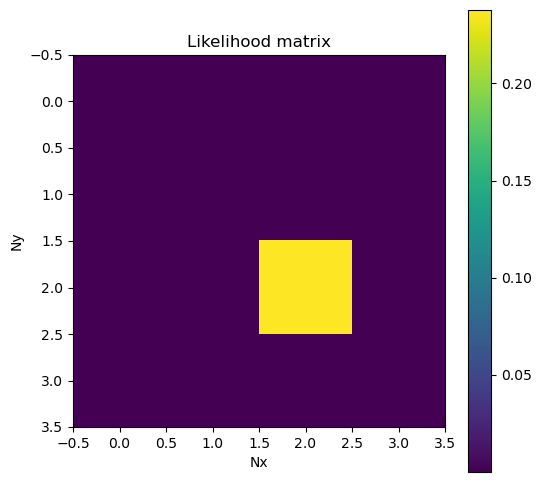

In [16]:
def compute_first_proba(s0, s1, d):
    # Compute the probability that N1_x differs from N1_0
    proba_diff = compute_prob_JC(d)
    
    # Compute the probability that N1_x is identical to N1_0
    proba_same = 1 - 3 * proba_diff
    
    return proba_same if s0[0] == s1[0] else proba_diff

d = 0.01

tot_likelyhood = 0
likelihoods = []

for Nx in range(4):
    for Ny in range(4):
        likelihood = (1/4) * (compute_first_proba(s0, [Nx], d) * compute_first_proba(s1, [Ny], d) * compute_first_proba([Nx], [Ny], d) * compute_first_proba(s2, [Ny], 2*d))
        tot_likelyhood += likelihood
        likelihoods.append(likelihood)
            
likelihoods = np.array(likelihoods).reshape(4, 4)

print(f"Total likelihood: {tot_likelyhood}")
print(f"Maximum likelihood: {np.max(likelihoods)} at index {np.unravel_index(np.argmax(likelihoods), likelihoods.shape)}")

fig, ax = plt.subplots(figsize=(6, 6))
im = ax.imshow(likelihoods, cmap='viridis', interpolation='nearest')
fig.colorbar(im, ax=ax)
ax.set_title('Likelihood matrix')
ax.set_xlabel('Nx')
ax.set_ylabel('Ny')
plt.show()

As it can be seen on the colormap visualization of the componants of the likelyhood, the contribution to the total amount is almost done only by the **(2,2) componant**. This is the case when comparing the total with the value in that cell : they are very close. 
This is consistent with the fact that the (2,2) componant is the one that is the **most likely** to be observed, because it corresponds to the **nucleotide G**. As this nucleotide is **already present** in the ancestral sequence, it is the most likely to be observed in the descendant sequence.

## 2.g) Decomposition for each site

Since we assume independent sites, we can calculate the likelihood of the full dataset under tree A by multiplying the likelihoods of each site:
$$
\mathcal{L}^{(i)} = \prod_j \mathcal{L}^{(j)} = \mathcal{L}^{(1)}\cdot \mathcal{L}^{(2)} \cdot ... \cdot \mathcal{L}^{(N)}
$$
where $N=309$ is the total number of sites in the dataset.

## 2.h) Full likelihood computation

In [17]:
site_likelihoods = np.zeros_like(s0, dtype=float)
d = 0.2

for i in range(len(s0)):
    tot_likelyhood = 0
    for Nx in range(4):
        for Ny in range(4):
            likelihood = (1/4) * (compute_first_proba([s0[i]], [Nx], d) * compute_first_proba([s1[i]], [Nx], d)* compute_first_proba([Nx], [Ny], d) * compute_first_proba([s2[i]], [Ny], 2*d))
            tot_likelyhood += likelihood
            
    site_likelihoods[i] = np.log(np.sum(tot_likelyhood))

log_likelihood_A = np.sum(site_likelihoods)

print(f"Log likelihood of the data given the model: {log_likelihood_A}")

Log likelihood of the data given the model: -1123.6245286845178


The probability is extremely low, with a log-likelihood of -1'123. This results in a likelihood value of $e^{-1'123}$. Without the log, this value would be **extremely small**, and very **hard** to **compute numerically**. The log-likelihood is therefore a more convenient way to represent the likelihood of the data.

## 2.i) Likelihood of different trees
The only thing to adapt is the contribution at each site to the total likelihood, which depends on the shape of the tree.

In [18]:
site_likelihoods_B = np.zeros_like(s0, dtype=float)
d = 0.2

for i in range(len(s0)):
    tot_likelyhood = 0
    for Nx in range(4):
        for Ny in range(4):
            likelihood = (1/4) * (compute_first_proba([s0[i]], [Nx], d) * compute_first_proba([s2[i]], [Nx], d)* compute_first_proba([Nx], [Ny], d) * compute_first_proba([s1[i]], [Ny], 2*d))
            tot_likelyhood += likelihood
            
    site_likelihoods_B[i] = np.log(np.sum(tot_likelyhood))

log_likelihood_B = np.sum(site_likelihoods_B)

print(f"Log likelihood of the data given the model: {log_likelihood_B}")

Log likelihood of the data given the model: -1187.907696174121


In [19]:
site_likelihoods_C = np.zeros_like(s0, dtype=float)
d = 0.2

for i in range(len(s0)):
    tot_likelyhood = 0
    for Nx in range(4):
        for Ny in range(4):
            likelihood = (1/4) * (compute_first_proba([s2[i]], [Nx], d) * compute_first_proba([s1[i]], [Nx], d)* compute_first_proba([Nx], [Ny], d) * compute_first_proba([s0[i]], [Ny], 2*d))
            tot_likelyhood += likelihood
            
    site_likelihoods_C[i] = np.log(np.sum(tot_likelyhood))

log_likelihood_C = np.sum(site_likelihoods_C)

print(f"Log likelihood of the data given the model: {log_likelihood_C}")

Log likelihood of the data given the model: -1181.9738653289269


In [20]:
treecomparison = pd.DataFrame(
    {
        "Model": ["A", "B", "C"],
        "Log likelihood": [log_likelihood_A, log_likelihood_B, log_likelihood_C]
    }
)

HTML(treecomparison.to_html(index=False))

Model,Log likelihood
A,-1123.624529
B,-1187.907696
C,-1181.973865


After computing the log-likelihood for each tree, we find that **tree A** has the highest log-likelihood, followed by **tree B** and **tree C**. This is consistent with our previous conclusion (using distances $d_{01}, d_{02}, d_{12}$) that **tree A** is likely to be the best model. 

Note that value of the log-likelihood only shows the **relative** likelihood of the different trees, and not the **absolute** likelihood. Therefore, we cannot say that the tree with the highest log-likelihood is the **correct** one, but only that it is the **most likely** one given the data.

## 2.j) Varying branch lengths d

/var/folders/d1/9cx8z_ys2djcvm7tx40gw40r0000gn/T/ipykernel_60281/2309500695.py:14: RuntimeWarning: divide by zero encountered in log
  site_likelihoods[i] = np.log(np.sum(tot_likelyhood))


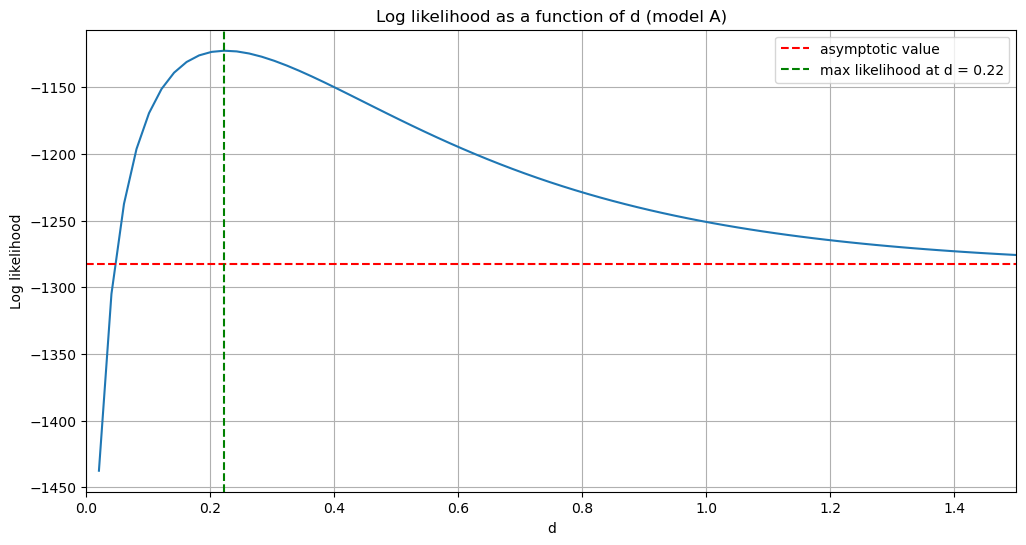

In [21]:
log_likelihoods = []
d_values = np.linspace(0, 2, 100)

for d in d_values:
    site_likelihoods = np.zeros_like(s0, dtype=float)

    for i in range(len(s0)):
        tot_likelyhood = 0
        for Nx in range(4):
            for Ny in range(4):
                likelihood = (1/4) * (compute_first_proba([s0[i]], [Nx], d) * compute_first_proba([s1[i]], [Nx], d)* compute_first_proba([Nx], [Ny], d) * compute_first_proba([s2[i]], [Ny], 2*d))
                tot_likelyhood += likelihood

        site_likelihoods[i] = np.log(np.sum(tot_likelyhood))

    log_likelihood = np.sum(site_likelihoods)
    log_likelihoods.append(log_likelihood)
    
max_d = d_values[np.argmax(log_likelihoods)]
    
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(d_values, log_likelihoods)
ax.axhline(y=log_likelihoods[-1], color='r', linestyle='--', label="asymptotic value")
ax.axvline(x=max_d, color='g', linestyle='--', label = f"max likelihood at d = {(max_d):.2f}")
ax.set_xlabel('d')
ax.set_xlim(0, 1.5)
ax.set_ylabel('Log likelihood')
ax.set_title('Log likelihood as a function of d (model A)')
ax.grid(True)
ax.legend()
plt.show()

The log-likelihood initially rises rapidly to a **peak** at $d \cong 0.22$, reaching $-1120$, before decreasing to a **plateau** at $-1280$ beyond $d = 0.22$. The plot then implies that longer branch lengths do not significantly enhance the fit of the tree to the data. This trend indicates that very small branch lengths are not much favored, suggesting that **optimal branch lengths** lie in the $0.1-0.3$ range where data consistency is higher.
The maximum likelihood approach indicates that a branch length of approximately $d≈0.2$ best estimates the evolutionary distances between sequences under Tree A, aligning with the observed trends in data likelihood.